# Mount dataset resources

In [1]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset/'
%pwd

/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset


'/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset'

# Income prediction using multi-model & EDA

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.

In [6]:
# Import the dataset
data = pd.read_csv('./adult.csv')
data.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


We modify column names 

In [7]:

my_columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Martial_status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_gain','Capital_loss', 'hours_per_week', 'Native_country','Target']
data.columns = my_columns
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,hours_per_week,Native_country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# Check the data type of each column and number of rows and columns present in the dataset
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education_num   48842 non-null  int64 
 5   Martial_status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Gender          48842 non-null  object
 10  Capital_gain    48842 non-null  int64 
 11  Capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  Native_country  48842 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
(48842, 15)


We can see there are 48842 rows and 15 columns. Some of the variables are continous and while others are categorical.

## Check whether there are any missing values

In [10]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

Workclass
2799
5.73%


Occupation
2809
5.75%


Native_country
857
1.75%




In [11]:
new_data = data
new_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,hours_per_week,Native_country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
from scipy.stats import mode
var = new_data.Workclass.mode()[0]
new_data.loc[new_data['Workclass'] == '?', 'Workclass'] = var

var1 = new_data.Occupation.mode()[0]
new_data.loc[new_data['Occupation'] == '?', 'Occupation'] = var1

var2 = new_data.Native_country.mode()[0]
new_data.loc[new_data['Native_country'] == '?', 'Native_country'] = var2
new_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,hours_per_week,Native_country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


Now all the missing values are replaced by mode of the column

## EDA

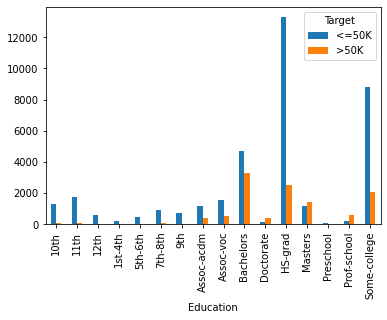

In [14]:
my_tab = pd.crosstab(index = data.Education,  # Make a crosstab
                     columns= data.Target)    # Name the count column

my_tab.plot.bar()


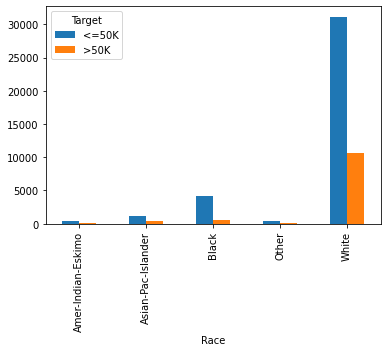

In [15]:
my_tab = pd.crosstab(index = data.Race,  # Make a crosstab
                     columns= data.Target)      # Name the count column

my_tab.plot.bar()


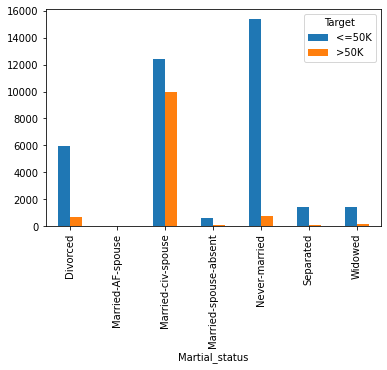

In [16]:
my_tab = pd.crosstab(index = data.Martial_status,  # Make a crosstab
                              columns= data.Target)      # Name the count column

my_tab.plot.bar()


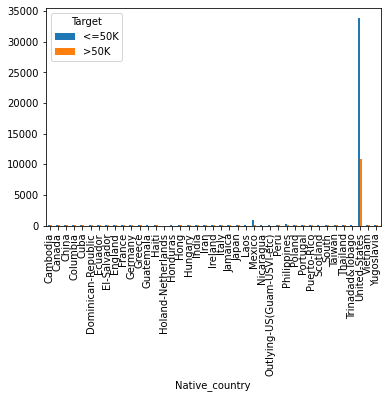

In [17]:
my_tab = pd.crosstab(index = data.Native_country,  # Make a crosstab
                              columns= data.Target)      # Name the count column

my_tab.plot.bar()


## **Feature Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Workclass_cat = le.fit_transform(new_data.Workclass)
Education_cat = le.fit_transform(new_data.Education)
Marital_cat   = le.fit_transform(new_data.Martial_status)
Occupation_cat = le.fit_transform(new_data.Occupation)
Relationship_cat = le.fit_transform(new_data.Relationship)
Race_cat = le.fit_transform(new_data.Race)
Sex_cat = le.fit_transform(new_data.Gender)
Native_country_cat = le.fit_transform(new_data.Native_country)
Target_cat = le.fit_transform(new_data.Target)



In [20]:
# Initialize the transformed values
new_data['Workclass'] = Workclass_cat
new_data['Education'] = Education_cat
new_data['Martial_status'] = Marital_cat
new_data['Occupation'] = Occupation_cat
new_data['Race'] = Race_cat
new_data['Gender'] = Sex_cat
new_data['Native_country'] = Native_country_cat

In [21]:
#dummy_fields = ['Workclass', 'Education', 'Martial_status', 'Occupation', 'Race','Sex', 'Native_country']
new_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,hours_per_week,Native_country,Target
0,25,3,226802,1,7,4,6,Own-child,2,1,0,0,40,38,<=50K
1,38,3,89814,11,9,2,4,Husband,4,1,0,0,50,38,<=50K
2,28,1,336951,7,12,2,10,Husband,4,1,0,0,40,38,>50K
3,44,3,160323,15,10,2,6,Husband,2,1,7688,0,40,38,>50K
4,18,3,103497,15,10,4,9,Own-child,4,0,0,0,30,38,<=50K


In [22]:
# split the target and predictor variables
X = new_data.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13]]
Y = new_data.iloc[:,14]
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Race,Gender,Capital_gain,Capital_loss,hours_per_week,Native_country
0,25,3,226802,1,7,4,6,2,1,0,0,40,38
1,38,3,89814,11,9,2,4,4,1,0,0,50,38
2,28,1,336951,7,12,2,10,4,1,0,0,40,38
3,44,3,160323,15,10,2,6,2,1,7688,0,40,38
4,18,3,103497,15,10,4,9,4,0,0,0,30,38


In [23]:
# Split the dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

### LogisticRegression

In [24]:
# Pipe line for multimodeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score 

lr = LogisticRegression()
Lr_model = lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_score_lr = accuracy_score(Y_test, Y_pred) 
print(acc_score_lr)

0.7896978134468922


### DecisionTreeClassifier

In [25]:
DTC = DecisionTreeClassifier()
DTC_model = DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)
acc_score_DTC = accuracy_score(Y_test, Y_pred)
print(acc_score_DTC)


0.8108263041519941


### RandomForestClassifier

In [26]:
RF = RandomForestClassifier(n_estimators=1000, n_jobs= 2, random_state= 5)
RF_model = RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)
acc_score_RF = accuracy_score(Y_test, Y_pred)
print(acc_score_RF)

0.8543116861845876


### SVM

In [27]:
SVM = SVC()
SVM_model = SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
acc_score_SVM = accuracy_score(Y_test, Y_pred)
print(acc_score_SVM)

0.7984604045532716
